#      EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Gradient Boosting
import lightgbm as lgb

# Scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
################################################


import csv

sns.set(style = "whitegrid")
import matplotlib as mlp
import os
import cufflinks as cf
import plotly.figure_factory as ff 
import plotly.offline as py
import plotly.graph_objs as go 

from plotly.offline import download_plotlyjs,init_notebook_mode, iplot, plot
from plotly import tools 
from matplotlib import pyplot
py.init_notebook_mode(connected = True)


cf.go_offline()

import warnings
warnings.filterwarnings('ignore')
#####################################################################################################

%matplotlib inline




plt.rcParams['figure.figsize'] = [16, 10]

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from datetime import datetime, date, time, timedelta
import datetime as dt
import calendar



%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings('ignore')

C:\Users\josea\Anaconda3_3\envs\datahack2\lib\site-packages\plotly\graph_objs\_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


C:\Users\josea\Anaconda3_3\envs\datahack2\lib\site-packages\plotly\graph_objs\_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [3]:
train = pd.read_csv("D:/BBDD/TAXI_NYC/train.csv")
test = pd.read_csv("D:/BBDD/TAXI_NYC/test.csv")


In [4]:
weather = pd.read_csv ("D:/BBDD/TAXI_NYC/weather_NY_2016.csv")

In [5]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [6]:
train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [7]:
train.describe().T

count        mean          std         min         25%  \
vendor_id          1458644.0    1.534950     0.498777    1.000000    1.000000   
passenger_count    1458644.0    1.664530     1.314242    0.000000    1.000000   
pickup_longitude   1458644.0  -73.973486     0.070902 -121.933342  -73.991867   
pickup_latitude    1458644.0   40.750921     0.032881   34.359695   40.737347   
dropoff_longitude  1458644.0  -73.973416     0.070643 -121.933304  -73.991325   
dropoff_latitude   1458644.0   40.751800     0.035891   32.181141   40.735885   
trip_duration      1458644.0  959.492273  5237.431724    1.000000  397.000000   

                          50%          75%           max  
vendor_id            2.000000     2.000000  2.000000e+00  
passenger_count      1.000000     2.000000  9.000000e+00  
pickup_longitude   -73.981743   -73.967331 -6.133553e+01  
pickup_latitude     40.754101    40.768360  5.188108e+01  
dropoff_longitude  -73.979752   -73.963013 -6.133553e+01  
dropoff_latitude    40.754524    40.769810  4.392103e+01  
trip_duration      662.000000  1075.000000  3.526282e+06

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
train.duplicated()

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1458614    False
1458615    False
1458616    False
1458617    False
1458618    False
1458619    False
1458620    False
1458621    False
1458622    False
1458623    False
1458624    False
1458625    False
1458626    False
1458627    False
1458628    False
1458629    False
1458630    False
1458631    False
1458632    False
1458633    False
1458634    False
1458635    False
1458636    False
1458637    False
1458638    False
1458639    False
1458640    False
1458641    Fal

In [11]:
train_dup=train[train.duplicated()]

In [12]:
train_dup.shape

(0, 11)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [14]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [15]:
test.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
625104    False
625105    False
625106    False
625107    False
625108    False
625109    False
625110    False
625111    False
625112    False
625113    False
625114    False
625115    False
625116    False
625117    False
625118    False
625119    False
625120    False
625121    False
625122    False
625123    False
625124    False
625125    False
625126    False
625127    False
625128    False
625129    False
625130    False
625131    False
625132    False
625133    False
Length: 625134, dtype: b

In [16]:
test_dup=test[test.duplicated()]

In [17]:
test_dup.shape

(0, 9)

#### EDA Y TRANSFORMACION BASICA DE VARIABLES

In [18]:
#store_and_fwd_flag = pd.get_dummies(train['store_and_fwd_flag'],drop_first=True)
#train = pd.concat([train,store_and_fwd_flag],axis=1)
#train.head()
#train['Y'].value_counts()
#train.drop(['store_and_fwd_flag'],axis=1,inplace=True)

#store_and_fwd_flag = pd.get_dummies(test['store_and_fwd_flag'],drop_first=True)
#test = pd.concat([test,store_and_fwd_flag],axis=1)
#test.head()
#test.drop(['store_and_fwd_flag'],axis=1,inplace=True)
#test['Y'].value_counts()

#train.drop(['dropoff_datetime'],axis=1,inplace=True)

#id_train = train.id
#id_test = test.id

#train.drop(['id'],axis=1,inplace=True)
#test.drop(['id'],axis=1, inplace=True)

In [19]:
train.describe(include='all')

id     vendor_id      pickup_datetime     dropoff_datetime  \
count     1458644  1.458644e+06              1458644              1458644   
unique    1458644           NaN              1380222              1380377   
top     id0832378           NaN  2016-04-05 18:55:21  2016-05-16 19:40:28   
freq            1           NaN                    5                    5   
mean          NaN  1.534950e+00                  NaN                  NaN   
std           NaN  4.987772e-01                  NaN                  NaN   
min           NaN  1.000000e+00                  NaN                  NaN   
25%           NaN  1.000000e+00                  NaN                  NaN   
50%           NaN  2.000000e+00                  NaN                  NaN   
75%           NaN  2.000000e+00                  NaN                  NaN   
max           NaN  2.000000e+00                  NaN                  NaN   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
count      1.458644e+06      1.458644e+06     1.458644e+06       1.458644e+06   
unique              NaN               NaN              NaN                NaN   
top                 NaN               NaN              NaN                NaN   
freq                NaN               NaN              NaN                NaN   
mean       1.664530e+00     -7.397349e+01     4.075092e+01      -7.397342e+01   
std        1.314242e+00      7.090186e-02     3.288119e-02       7.064327e-02   
min        0.000000e+00     -1.219333e+02     3.435970e+01      -1.219333e+02   
25%        1.000000e+00     -7.399187e+01     4.073735e+01      -7.399133e+01   
50%        1.000000e+00     -7.398174e+01     4.075410e+01      -7.397975e+01   
75%        2.000000e+00     -7.396733e+01     4.076836e+01      -7.396301e+01   
max        9.000000e+00     -6.133553e+01     5.188108e+01      -6.133553e+01   

        dropoff_latitude store_and_fwd_flag  trip_duration  
count       1.458644e+06            1458644   1.458644e+06  
unique               NaN                  2            NaN  
top                  NaN                  N            NaN  
freq                 NaN            1450599            NaN  
mean        4.075180e+01                NaN   9.594923e+02  
std         3.589056e-02                NaN   5.237432e+03  
min         3.218114e+01                NaN   1.000000e+00  
25%         4.073588e+01                NaN   3.970000e+02  
50%         4.075452e+01                NaN   6.620000e+02  
75%         4.076981e+01                NaN   1.075000e+03  
max         4.392103e+01                NaN   3.526282e+06

In [20]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.000      1458644.000       1458644.000      1458644.000   
mean        1.535            1.665           -73.973           40.751   
std         0.499            1.314             0.071            0.033   
min         1.000            0.000          -121.933           34.360   
25%         1.000            1.000           -73.992           40.737   
50%         2.000            1.000           -73.982           40.754   
75%         2.000            2.000           -73.967           40.768   
max         2.000            9.000           -61.336           51.881   

       dropoff_longitude  dropoff_latitude  trip_duration  
count        1458644.000       1458644.000    1458644.000  
mean             -73.973            40.752        959.492  
std                0.071             0.036       5237.432  
min             -121.933            32.181          1.000  
25%              -73.991            40.736        397.000  
50%              -73.980            40.755        662.000  
75%              -73.963            40.770       1075.000  
max              -61.336            43.921    3526282.000

Mi opinión inicial sobre esto es que desde el campo `pickup_datetime` deberíamos extraer la hora del día y el día de la semana y el día del mes. Esto parece lógico ya que el tráfico en hora pico y los días de fin de semana frente a los que no son fines de semana podrían tener un efecto mayor en los tiempos de viaje. Similar a esto, podría haber estacionalidad en los tiempos de viaje que se observarán entre los diferentes meses del año. Piense, por ejemplo, en el efecto que podrían tener los meses de invierno de Nueva York en el tiempo de viaje. Si las carreteras están mojadas / heladas, es menos probable que conduzca muy rápido, por lo que, independientemente de la ruta que tome, tardará un poco más en llegar a su destino.

Una variable interesante y sus efectos para explorar potencialmente es el `passenger_count`. Se podría argumentar que un mayor número de pasajeros podría dar lugar a algunos escenarios. Por ejemplo, podría dar lugar a un aumento en las paradas en el camino, lo que en última instancia prolonga el tiempo de A a B (tenga en cuenta que no se nos da el número de pasajeros al inicio y al final del viaje; mi pensamiento es que si Si supiéramos el número inicial y final de pasajeros en un viaje, los datos entre los descensos se dividirían en entradas separadas, con la última entrada en una colección de filas que terminaría con 0 pasajeros). Además, desde un punto de vista puramente físico, cuanto mayor es el número de pasajeros, más pesado es el vehículo, más lento puede moverse el vehículo. Aunque estoy bastante seguro de que el efecto de esto es despreciable.

Lo mismo con `vendor` y` store_and_fwd_flag`. Es posible que al buscarlo, encontremos que hay una diferencia entre el proveedor 1 y el proveedor 2, y que cualquiera de los dos podría estar corrompiendo la "información de ruta más corta" porque los empleados del proveedor son menos eficientes para encontrar las mejores rutas a través de Nueva York. Esto, sin embargo, también me parece altamente improbable, pero es una alternativa para explorar (al menos mirarlo y descartarlo de manera difinitiva). En cuanto a `store_and_fwd_flag` - no tener una conexión con el servidor para que una ruta en particular sea indicativa de algunas cosas. Por ejemplo, si tras la inspección se descubre que existe una fuerte correlación entre los tiempos de viaje lentos y las desconexiones del servidor, podría usarse como otra característica en el modelo de entrenamiento para predecir el tiempo que podría tomar una ruta en particular.

Sin embargo, en lo que respecta a las variables `_lattitude` y` _longitute` es donde creo que reside el mayor valor. Las opciones aquí son agruparlas en "barrios" y encontrar la distancia y las direcciones entre las coordenadas.

#### TRANSFORMACION VARIABLE 'trip_duration' 

In [21]:
train['trip_duration'].max() // 3600

979

La variable `trip_duration`, se observa que tiene viajes de 1 segundo y viajes de 979 horas, lo cual es bastante extraño, asi que decido quitar los valores que se encuentren fuera de 2 desviaciones estándar de la media. 

In [22]:
med_trip_duration = np.mean(train['trip_duration'])
desv_trip_duration  = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= med_trip_duration + 2*desv_trip_duration]
train = train[train['trip_duration'] >= med_trip_duration - 2*desv_trip_duration]

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1456540.000      1456540.000       1456540.000      1456540.000   
mean        1.534            1.664           -73.973           40.751   
std         0.499            1.314             0.071            0.033   
min         1.000            0.000          -121.933           34.360   
25%         1.000            1.000           -73.992           40.737   
50%         2.000            1.000           -73.982           40.754   
75%         2.000            2.000           -73.967           40.768   
max         2.000            9.000           -61.336           51.881   

       dropoff_longitude  dropoff_latitude  trip_duration  
count        1456540.000       1456540.000    1456540.000  
mean             -73.973            40.752        836.858  
std                0.071             0.036        658.930  
min             -121.933            32.181          1.000  
25%              -73.991            40.736        397.000  
50%              -73.980            40.755        662.000  
75%              -73.963            40.770       1073.000  
max              -61.336            43.921      11411.000

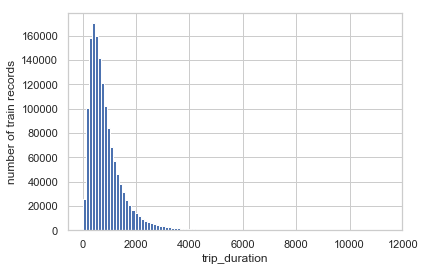

In [24]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

In [25]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

#### graficas

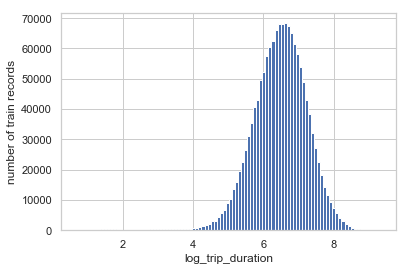

In [26]:
#train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('number of train records')
plt.show()

In [27]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)


In [28]:
train.head(10)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456540 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1456540 non-null object
vendor_id             1456540 non-null int64
pickup_datetime       1456540 non-null datetime64[ns]
dropoff_datetime      1456540 non-null object
passenger_count       1456540 non-null int64
pickup_longitude      1456540 non-null float64
pickup_latitude       1456540 non-null float64
dropoff_longitude     1456540 non-null float64
dropoff_latitude      1456540 non-null float64
store_and_fwd_flag    1456540 non-null object
trip_duration         1456540 non-null int64
log_trip_duration     1456540 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 144.5+ MB


In [29]:
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

Convertimos la variable pickup_datetime en una serie temporal, para despues separar por fechas.

In [30]:
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [31]:
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
train.head(10)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456540 entries, 0 to 1458643
Data columns (total 13 columns):
id                    1456540 non-null object
vendor_id             1456540 non-null int64
pickup_datetime       1456540 non-null datetime64[ns]
dropoff_datetime      1456540 non-null object
passenger_count       1456540 non-null int64
pickup_longitude      1456540 non-null float64
pickup_latitude       1456540 non-null float64
dropoff_longitude     1456540 non-null float64
dropoff_latitude      1456540 non-null float64
store_and_fwd_flag    1456540 non-null object
trip_duration         1456540 non-null int64
log_trip_duration     1456540 non-null float64
pickup_date           1456540 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 155.6+ MB


In [32]:
train['pickup_date'].value_counts()
#train['pickup_datetime'].value.conts()

2016-04-09    9781
2016-03-05    9586
2016-04-16    9583
2016-04-02    9309
2016-02-13    9290
2016-05-07    9272
2016-04-15    9261
2016-03-12    9230
2016-03-04    9221
2016-02-27    9215
2016-04-08    9198
2016-05-06    9187
2016-01-30    9156
2016-03-19    9126
2016-05-14    9122
2016-05-21    9113
2016-02-11    9107
2016-03-18    9100
2016-02-12    9095
2016-02-26    9051
2016-02-20    8906
2016-02-06    8888
2016-05-05    8881
2016-03-03    8881
2016-06-04    8875
2016-03-11    8864
2016-04-14    8836
2016-05-20    8794
2016-01-22    8791
2016-01-16    8779
              ... 
2016-06-27    7303
2016-05-23    7295
2016-01-11    7267
2016-03-21    7241
2016-06-28    7241
2016-03-28    7222
2016-02-22    7201
2016-01-05    7190
2016-05-09    7161
2016-01-01    7144
2016-01-18    7143
2016-05-31    7121
2016-06-13    7104
2016-06-12    7104
2016-02-08    7103
2016-06-26    7072
2016-02-01    7056
2016-04-25    7023
2016-05-28    6983
2016-06-19    6954
2016-01-26    6925
2016-06-20  

In [33]:
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date

In [34]:
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)#la convertimos tambien en serie numerica

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456540 entries, 0 to 1458643
Data columns (total 13 columns):
id                    1456540 non-null object
vendor_id             1456540 non-null int64
pickup_datetime       1456540 non-null datetime64[ns]
dropoff_datetime      1456540 non-null datetime64[ns]
passenger_count       1456540 non-null int64
pickup_longitude      1456540 non-null float64
pickup_latitude       1456540 non-null float64
dropoff_longitude     1456540 non-null float64
dropoff_latitude      1456540 non-null float64
store_and_fwd_flag    1456540 non-null object
trip_duration         1456540 non-null int64
log_trip_duration     1456540 non-null float64
pickup_date           1456540 non-null object
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 155.6+ MB


In [36]:
train['store_and_fwd_flag'].value_counts()

N    1448495
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [37]:
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')

In [38]:
test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [39]:
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())

In [40]:
#duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]

In [41]:
##vamos a ver cual es el viaje mas largo en segundos, aproximadamente 979 horas, algo extraño

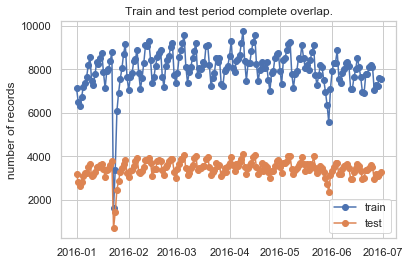

In [42]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Train and test period complete overlap.')
plt.legend(loc=0)
plt.ylabel('number of records')
plt.show()

Observamos, que tanto el train como el test, se distribuye en el mismo espacio temporal.Y tienen una grafica muy similar.Es notori que hay dos descensos importantes del uso del taxi, uno a finales de Enero y otro a finales de Mayo, con menor fuerza que la primera. La que ocurre en primer lugar podria estar relacionada con el tiempo, es decir, con un dia de nieve muy fuerte y por consecuencia no se toamaran tantos taxis como lo habitual, o una posible huelga.

Por lo tanto, no hay diferencias significativas evidentes que puedan explicarse por la cantidad de pasajeros en el vehículo para un viaje determinado. Es interesante notar que hay un promedio de viajes de + -4min asociados con no pasajeros. Probablemente se trate de un error en el registro de los datos, a menos que el empleado del proveedor se cargue a sí mismo por los viajes en el trabajo.

No handles with labels found to put in legend.


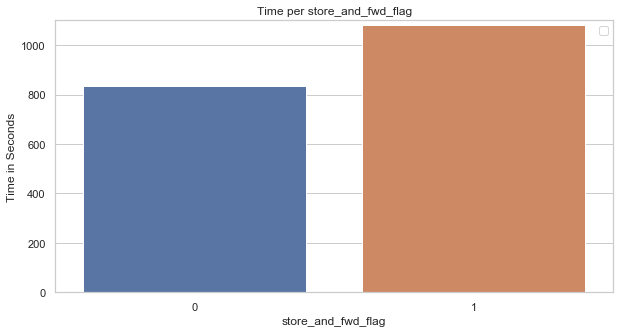

In [43]:
snwflag = train.groupby('store_and_fwd_flag')['trip_duration'].mean()

plt.subplots(1,1,figsize=(10,5))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(snwflag.index,snwflag.values)

Así que parece que el `store_and_fwd_flag` discrimina bien entre los tiempos de viaje. Claramente, hay un ligero sesgo en los datos donde algunos de los empleados del proveedor no registraron sus tiempos de viaje con precisión.

Tengamos una vista impresionante de la ciudad de Nueva York con HeatMap animado :)
¡Lo primero es lo primero! Establecer tema! Vamos a trazar la bella ciudad de Nueva York a dónde iremos con la ayuda de nuestras coordenadas de recogida y devolución.

Trazaremos las ubicaciones de entrega de mes a mes (series de tiempo) usando HeatMap.

Usaremos la biblioteca de Folium para esto, que es una envoltura de python para el Folleto del paquete R.

Hay algunas coordenadas de latitud y longitud que están muy lejos de la ciudad de Nueva York. Vamos a filtrarlos.

In [44]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_hour'] = train['pickup_datetime'].dt.hour

train['drop_day'] = train['dropoff_datetime'].dt.day
train['drop_month'] = train['dropoff_datetime'].dt.month
train['drop_weekday'] = train['dropoff_datetime'].dt.weekday
train['drop_hour'] = train['dropoff_datetime'].dt.hour

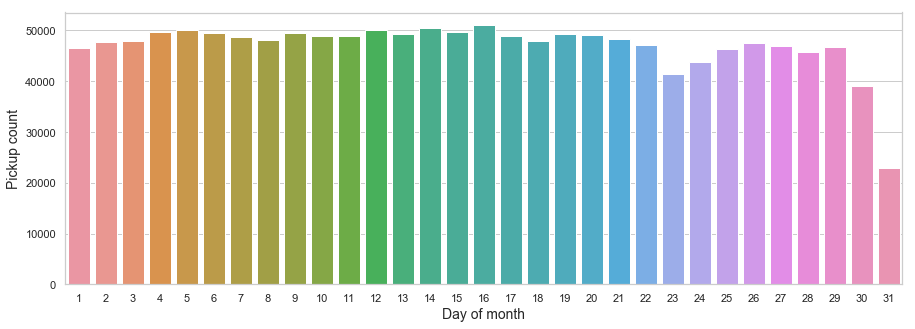

In [45]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_day', data=train)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

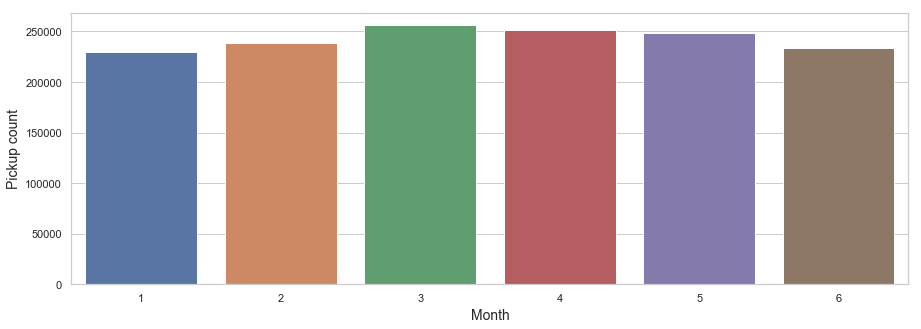

In [46]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_month', data=train)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

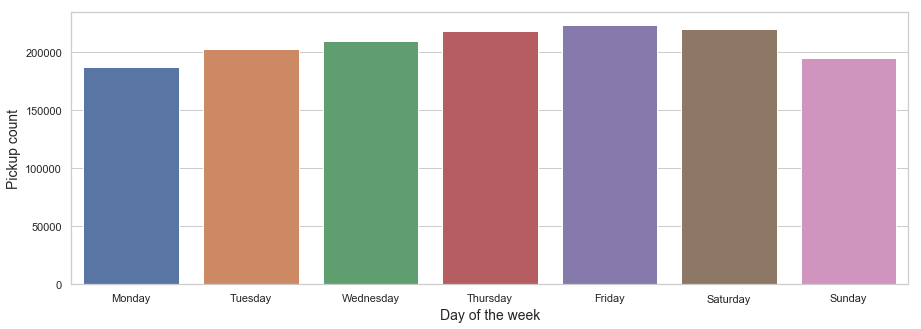

In [47]:
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

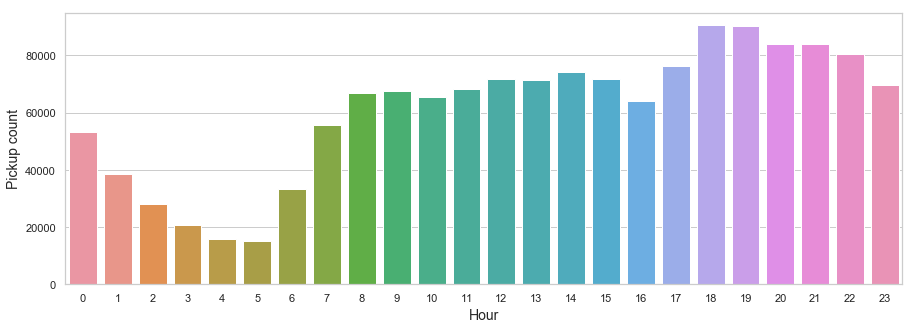

In [48]:
f = plt.figure(figsize=(15,5))
sns.countplot(x='pickup_hour', data=train)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.show()

El uso de los taxis disminuye gradualmente después de la media noche. El mayo uso es alrededor de las 6 pm y las 7 pm en la tarde, lo cual tiene sentido ya que muchas personas se dirigen a sus hogares desde la oficina.

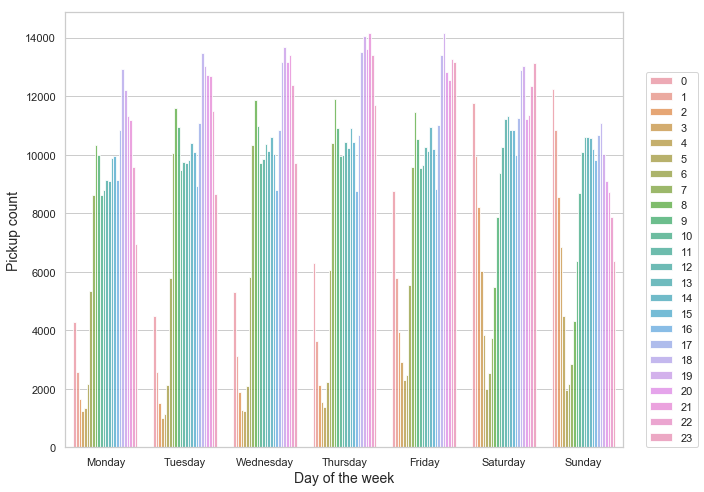

In [49]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Pickup count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()



El mayor frecuencia de uso, como comentamos antes es a partir de las 19:00, pero destaca su uso los viernes y sabados de madrugada. Ya que es descanso del fin de semana y se suele salir mas.

In [54]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

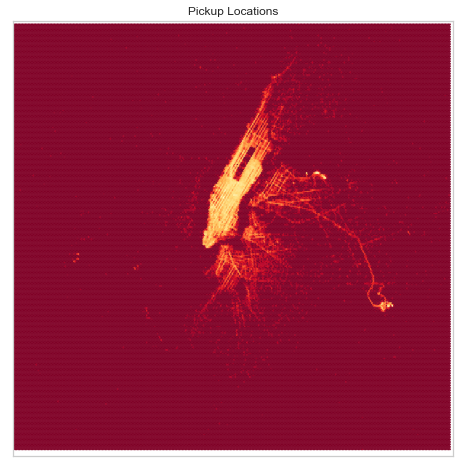

In [55]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
train = train[(train['pickup_longitude'] > west) & (train['pickup_longitude'] < east)]
train = train[(train['pickup_latitude'] > south) & (train['pickup_latitude'] < north)]

fig = plt.figure(figsize=(14,8))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')
x, y = m(train['pickup_longitude'].values, train['pickup_latitude'].values)
m.hexbin(x, y, gridsize=300, bins='log', cmap=cm.YlOrRd_r, lw=0.4)

plt.title('Pickup Locations')
plt.show()

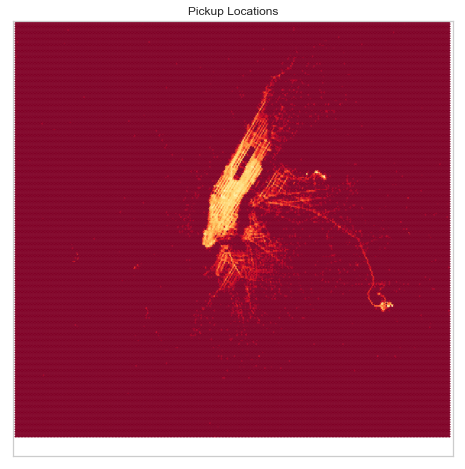

In [56]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
test = test[(test['pickup_longitude'] > west) & (test['pickup_longitude'] < east)]
test = test[(test['pickup_latitude'] > south) & (test['pickup_latitude'] < north)]

fig = plt.figure(figsize=(14,8))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')
x, y = m(test['pickup_longitude'].values, test['pickup_latitude'].values)
m.hexbin(x, y, gridsize=300, bins='log', cmap=cm.YlOrRd_r, lw=0.4)

plt.title('Pickup Locations')
plt.show()

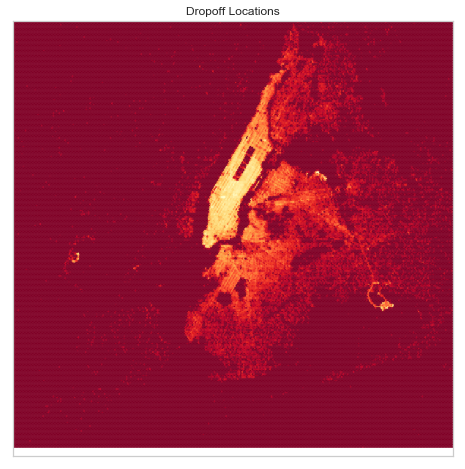

In [57]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
train = train[(train['dropoff_longitude'] > west) & (train['dropoff_longitude'] < east)]
train = train[(train['dropoff_latitude'] > south) & (train['dropoff_latitude'] < north)]

fig = plt.figure(figsize=(14,8))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')
x, y = m(train['dropoff_longitude'].values, train['dropoff_latitude'].values)
m.hexbin(x, y, gridsize=300, bins='log', cmap=cm.YlOrRd_r, lw=0.4)

plt.title('Dropoff Locations')
plt.show()

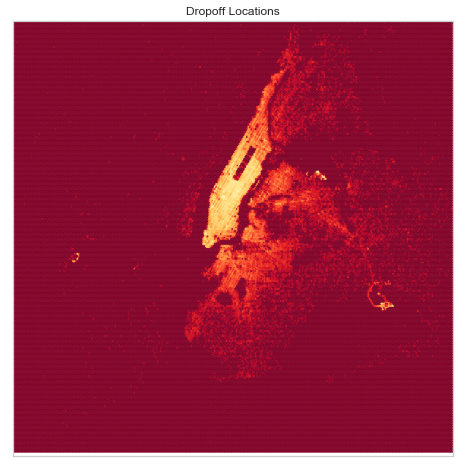

In [58]:
west, south, east, north = -74.26, 40.50, -73.70, 40.92
test = test[(test['dropoff_longitude'] > west) & (test['dropoff_longitude'] < east)]
test = test[(test['dropoff_latitude'] > south) & (test['dropoff_latitude'] < north)]

fig = plt.figure(figsize=(14,8))

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')
x, y = m(test['dropoff_longitude'].values, test['dropoff_latitude'].values)
m.hexbin(x, y, gridsize=300, bins='log', cmap=cm.YlOrRd_r, lw=0.4)

plt.title('Dropoff Locations')
plt.show()

In [60]:
import geojson

In [61]:
json_data = geojson.load(open('D:/BBDD/TAXI_NYC/community-districts-polygon.geojson'))
json_data.keys()
polygons = json_data['features']
FILL = '#6699cc'
CONT = '#1a169e'

In [67]:
from descartes import PolygonPatch
from sklearn.cluster import MiniBatchKMeans


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geojson
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from descartes import PolygonPatch
from haversine import haversine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [76]:
coords = np.vstack((train[['pickup_latitude',  'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    train[['pickup_latitude',  'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords)

In [79]:
def derive_features(train):
    train = train.copy()
    # Pickup-based features
    train['pickup_date'] = train['pickup_datetime'].dt.date
    train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
    train['pickup_hour'] = train['pickup_datetime'].dt.hour
    train['pickup_month'] = train['pickup_datetime'].dt.month
    train['pickup_day'] = train['pickup_datetime'].dt.day
    # Brand new features
    train['haversine_distance'] = train.apply(lambda x: haversine((x['pickup_latitude'],  x['pickup_longitude']), 
                                                            (x['dropoff_latitude'], x['dropoff_longitude'])), axis=1)
    train['pickup_cluster']  = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
    train['dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
    return train

In [81]:
train = derive_features(train)

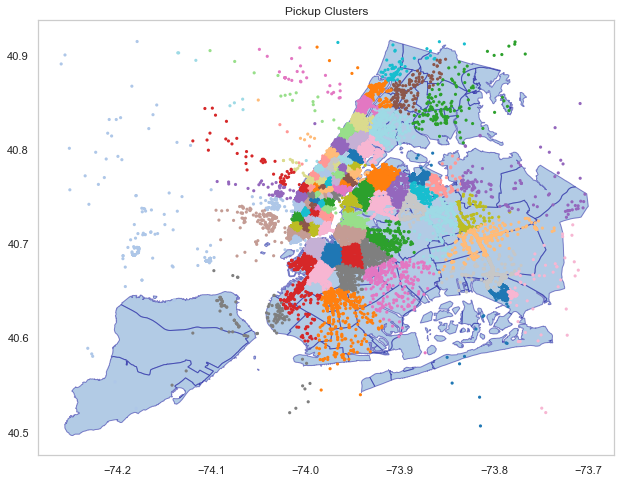

In [82]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca() 

for i in range(len(polygons)):
    coordlist = polygons[i]['geometry']['coordinates']
    poly = {'type':'Polygon', 'coordinates':coordlist}
    ax.add_patch(PolygonPatch(poly, fc=FILL, ec=CONT, alpha=0.5, zorder=1))
    ax.axis('scaled')

ax.scatter(train['pickup_longitude'].values, train['pickup_latitude'], s=10, lw=0,
           c=train['pickup_cluster'].values, cmap='tab20', zorder=2)
plt.title('Pickup Clusters')
plt.grid(False)